In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [0]:
sns.set()
# suppress warnings (warnings do not prevent the code from executing)
import warnings

warnings.filterwarnings("ignore")

In [564]:
pip install kmodes

In [457]:
pip install --upgrade kmodes

Requirement already up-to-date: kmodes in /usr/local/lib/python3.6/dist-packages (0.10.2)


In [458]:
! pip install hdbscan

In [0]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from sqlalchemy import create_engine
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import statsmodels.api as sm
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import time
from sklearn.datasets import fetch_openml
import pandas_profiling
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
#from sklearn.datasets import fetch_mldata
%matplotlib inline
# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [566]:

# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
health0=pd.read_csv('/content/drive/My Drive/Patient_Characteristics_Survey__PCS___2017.csv')

In [0]:
health=health0.copy()

In [583]:
health.shape

(187192, 67)

In [570]:
health.head(2)

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NOT MI - OTHER,YES,YES,NO,NO,YES,UNKNOWN,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,132
1,2017,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,YES,UNKNOWN,UNKNOWN,NO,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,YES,MENTAL ILLNESS,UNKNOWN,YES,UNKNOWN,NO,NO,YES,YES,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,UNKNOWN,146


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [571]:
z=zip(range(67),list(health))
list(z)

[(0, 'Survey Year'),
 (1, 'Program Category'),
 (2, 'Region Served'),
 (3, 'Age Group'),
 (4, 'Sex'),
 (5, 'Transgender'),
 (6, 'Sexual Orientation'),
 (7, 'Hispanic Ethnicity'),
 (8, 'Race'),
 (9, 'Living Situation'),
 (10, 'Household Composition'),
 (11, 'Preferred Language'),
 (12, 'Veteran Status'),
 (13, 'Employment Status'),
 (14, 'Number Of Hours Worked Each Week'),
 (15, 'Education Status'),
 (16, 'Special Education Services'),
 (17, 'Mental Illness'),
 (18, 'Intellectual Disability'),
 (19, 'Autism Spectrum'),
 (20, 'Other Developmental Disability'),
 (21, 'Alcohol Related Disorder'),
 (22, 'Drug Substance Disorder'),
 (23, 'Mobility Impairment Disorder'),
 (24, 'Hearing Visual Impairment'),
 (25, 'Hyperlipidemia'),
 (26, 'High Blood Pressure'),
 (27, 'Diabetes'),
 (28, 'Obesity'),
 (29, 'Heart Attack'),
 (30, 'Stroke'),
 (31, 'Other Cardiac'),
 (32, 'Pulmonary Asthma'),
 (33, 'Alzheimer or Dementia'),
 (34, 'Kidney Disease'),
 (35, 'Liver Disease'),
 (36, 'Endocrine Condition

  **DROPPING SOME FEATURES**

In [0]:
cols=[0,1,2,5,7,8,11,14,16,45,46,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66]

In [0]:
health.drop(health.columns[cols],1,inplace=True)

In [586]:
health.shape

(187192, 40)

In [576]:
z=zip(range(40),list(health))
list(z)

[(0, 'Age Group'),
 (1, 'Sex'),
 (2, 'Sexual Orientation'),
 (3, 'Living Situation'),
 (4, 'Household Composition'),
 (5, 'Veteran Status'),
 (6, 'Employment Status'),
 (7, 'Education Status'),
 (8, 'Mental Illness'),
 (9, 'Intellectual Disability'),
 (10, 'Autism Spectrum'),
 (11, 'Other Developmental Disability'),
 (12, 'Alcohol Related Disorder'),
 (13, 'Drug Substance Disorder'),
 (14, 'Mobility Impairment Disorder'),
 (15, 'Hearing Visual Impairment'),
 (16, 'Hyperlipidemia'),
 (17, 'High Blood Pressure'),
 (18, 'Diabetes'),
 (19, 'Obesity'),
 (20, 'Heart Attack'),
 (21, 'Stroke'),
 (22, 'Other Cardiac'),
 (23, 'Pulmonary Asthma'),
 (24, 'Alzheimer or Dementia'),
 (25, 'Kidney Disease'),
 (26, 'Liver Disease'),
 (27, 'Endocrine Condition'),
 (28, 'Neurological Condition'),
 (29, 'Traumatic Brain Injury'),
 (30, 'Joint Disease'),
 (31, 'Cancer'),
 (32, 'Other Chronic Med Condition'),
 (33, 'No Chronic Med Condition'),
 (34, 'Unknown Chronic Med Condition'),
 (35, 'Smokes'),
 (36, '

In [0]:
cols2=[3,4,5,6,32,33,34,38]

In [0]:
health.drop(health.columns[cols2],1,inplace=True)

In [589]:
health.shape

(187192, 32)

In [578]:
z=zip(range(32),list(health))
list(z)

[(0, 'Age Group'),
 (1, 'Sex'),
 (2, 'Sexual Orientation'),
 (3, 'Living Situation'),
 (4, 'Household Composition'),
 (5, 'Veteran Status'),
 (6, 'Employment Status'),
 (7, 'Education Status'),
 (8, 'Mental Illness'),
 (9, 'Intellectual Disability'),
 (10, 'Autism Spectrum'),
 (11, 'Other Developmental Disability'),
 (12, 'Alcohol Related Disorder'),
 (13, 'Drug Substance Disorder'),
 (14, 'Mobility Impairment Disorder'),
 (15, 'Hearing Visual Impairment'),
 (16, 'Hyperlipidemia'),
 (17, 'High Blood Pressure'),
 (18, 'Diabetes'),
 (19, 'Obesity'),
 (20, 'Heart Attack'),
 (21, 'Stroke'),
 (22, 'Other Cardiac'),
 (23, 'Pulmonary Asthma'),
 (24, 'Alzheimer or Dementia'),
 (25, 'Kidney Disease'),
 (26, 'Liver Disease'),
 (27, 'Endocrine Condition'),
 (28, 'Neurological Condition'),
 (29, 'Traumatic Brain Injury'),
 (30, 'Joint Disease'),
 (31, 'Cancer')]

**LOOKING AT ADULTS ONLY**

In [0]:
health=health[health['Age Group']=='ADULT']

In [0]:
health.drop('Age Group',1,inplace=True)

In [592]:
health.shape

(148205, 31)

**NEED TO DELETE SOME SUBCATEGORIES** 

In [0]:
for col in list(health):
  health = health[~health[col].str.contains('NOT APPLICABLE')]


In [594]:
health.shape

(148205, 31)

In [0]:
for col in list(health):
  health = health[~health[col].str.contains('UNKNOWN')]

In [596]:
health.shape

(105314, 31)

**SHOULD HAVE  (105314, 31) AT THIS POINT**

  **SELECTING ONLY 10%**

In [0]:
health2=health.sample(frac=1/10)

In [0]:
health_dummies = pd.get_dummies(health2)

In [485]:
health_dummies.shape

(10531, 72)

/////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
#standard_embedding = umap.UMAP(random_state=42).fit_transform(health)
#plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target, s=0.1, cmap='Spectral');

**////////////////////////////////////////////////////////////////////////////////**/////

#**UMAP**

In [0]:
!pip install umap-learn


/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


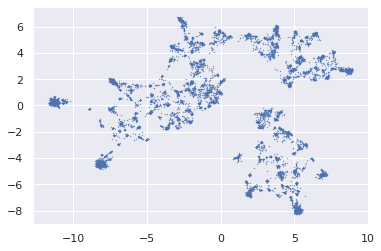

In [0]:
standard_embedding = umap.UMAP().fit_transform(health_dummies)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1],  s=0.1, cmap='Spectral');

In [0]:
standard_embedding

array([[ 7.613401  ,  2.8199348 ],
       [-1.8417028 ,  2.2375908 ],
       [ 4.894345  ,  2.720803  ],
       ...,
       [ 7.063168  , -5.2647038 ],
       [ 3.3822436 , -0.416551  ],
       [-2.1447308 , -0.41460288]], dtype=float32)

**////////////////////////////////////////////////////////////////////////////////////////////**

In [486]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=500, gen_min_span_tree=True,prediction_data=True)
clusterer.fit(standard_embedding)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=500, min_samples=None, p=None,
        prediction_data=True)

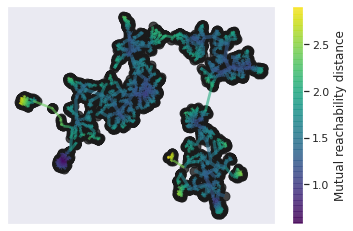

In [0]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

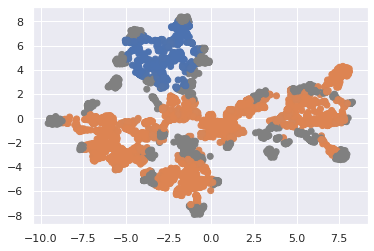

In [0]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(standard_embedding.T[0], standard_embedding.T[1], c=cluster_colors)

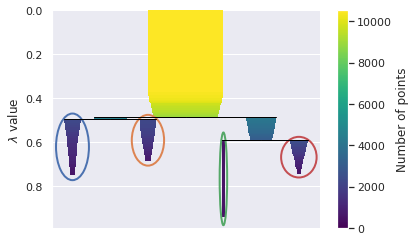

In [0]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [0]:
clusterer.labels_

array([ 0,  3,  0, ..., -1,  1,  3])

In [0]:
clusterer.outlier_scores_

array([0.        , 0.        , 0.        , ..., 0.14014344, 0.19231734,
       0.        ])

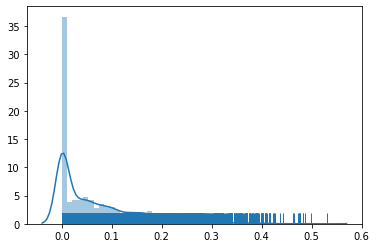

In [0]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

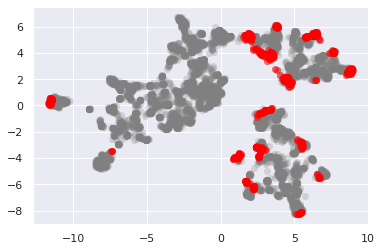

In [487]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*standard_embedding.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*standard_embedding[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

**ASSIGN LABELS TO HEALTH DUMMIES PANDAS**

In [0]:
health_dummies['Cluster']=clusterer.labels_

In [489]:
health_dummies.head(3)

,Sex_FEMALE,Sex_MALE,Sexual Orientation_BISEXUAL,Sexual Orientation_CLIENT DID NOT ANSWER,Sexual Orientation_LESBIAN OR GAY,Sexual Orientation_OTHER,Sexual Orientation_STRAIGHT OR HETEROSEXUAL,Education Status_COLLEGE OR GRADUATE DEGREE,Education Status_MIDDLE SCHOOL TO HIGH SCHOOL,Education Status_NO FORMAL EDUCATION,Education Status_OTHER,Education Status_PRE-K TO FIFTH GRADE,Education Status_SOME COLLEGE,Mental Illness_NO,Mental Illness_YES,Intellectual Disability_NO,Intellectual Disability_YES,Autism Spectrum_NO,Autism Spectrum_YES,Other Developmental Disability_NO,Other Developmental Disability_YES,Alcohol Related Disorder_NO,Alcohol Related Disorder_YES,Drug Substance Disorder_NO,Drug Substance Disorder_YES,Mobility Impairment Disorder_NO,Mobility Impairment Disorder_YES,Hearing Visual Impairment_NO,Hearing Visual Impairment_YES,Hyperlipidemia_NO,Hyperlipidemia_YES,High Blood Pressure_NO,High Blood Pressure_YES,Diabetes_NO,Diabetes_YES,Obesity_NO,Obesity_YES,Heart Attack_NO,Heart Attack_YES,Stroke_NO,Stroke_YES,Other Cardiac_NO,Other Cardiac_YES,Pulmonary Asthma_NO,Pulmonary Asthma_YES,Alzheimer or Dementia_NO,Alzheimer or Dementia_YES,Kidney Disease_NO,Kidney Disease_YES,Liver Disease_NO,Liver Disease_YES,Endocrine Condition_NO,Endocrine Condition_YES,Neurological Condition_NO,Neurological Condition_YES,Traumatic Brain Injury_NO,Traumatic Brain Injury_YES,Joint Disease_NO,Joint Disease_YES,Cancer_NO,Cancer_YES,Smokes_NO,Smokes_YES,Serious Mental Illness_NO,Serious Mental Illness_YES,Principal Diagnosis Class_MENTAL ILLNESS,Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS,Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER,Principal Diagnosis Class_NOT MI - OTHER,Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,Criminal Justice Status_NO,Criminal Justice Status_YES,Cluster
109580,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0
183779,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,3
116488,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0


In [490]:
cluster_neg=health_dummies[health_dummies['Cluster']==-1]
cluster_neg.shape

(2979, 73)

In [512]:
cluster0=health_dummies[health_dummies['Cluster']==0]
cluster0.shape

(2297, 73)

In [546]:
cluster0.describe()

,Sex_FEMALE,Sex_MALE,Sexual Orientation_BISEXUAL,Sexual Orientation_CLIENT DID NOT ANSWER,Sexual Orientation_LESBIAN OR GAY,Sexual Orientation_OTHER,Sexual Orientation_STRAIGHT OR HETEROSEXUAL,Education Status_COLLEGE OR GRADUATE DEGREE,Education Status_MIDDLE SCHOOL TO HIGH SCHOOL,Education Status_NO FORMAL EDUCATION,Education Status_OTHER,Education Status_PRE-K TO FIFTH GRADE,Education Status_SOME COLLEGE,Mental Illness_NO,Mental Illness_YES,Intellectual Disability_NO,Intellectual Disability_YES,Autism Spectrum_NO,Autism Spectrum_YES,Other Developmental Disability_NO,Other Developmental Disability_YES,Alcohol Related Disorder_NO,Alcohol Related Disorder_YES,Drug Substance Disorder_NO,Drug Substance Disorder_YES,Mobility Impairment Disorder_NO,Mobility Impairment Disorder_YES,Hearing Visual Impairment_NO,Hearing Visual Impairment_YES,Hyperlipidemia_NO,Hyperlipidemia_YES,High Blood Pressure_NO,High Blood Pressure_YES,Diabetes_NO,Diabetes_YES,Obesity_NO,Obesity_YES,Heart Attack_NO,Heart Attack_YES,Stroke_NO,Stroke_YES,Other Cardiac_NO,Other Cardiac_YES,Pulmonary Asthma_NO,Pulmonary Asthma_YES,Alzheimer or Dementia_NO,Alzheimer or Dementia_YES,Kidney Disease_NO,Kidney Disease_YES,Liver Disease_NO,Liver Disease_YES,Endocrine Condition_NO,Endocrine Condition_YES,Neurological Condition_NO,Neurological Condition_YES,Traumatic Brain Injury_NO,Traumatic Brain Injury_YES,Joint Disease_NO,Joint Disease_YES,Cancer_NO,Cancer_YES,Smokes_NO,Smokes_YES,Serious Mental Illness_NO,Serious Mental Illness_YES,Principal Diagnosis Class_MENTAL ILLNESS,Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS,Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER,Principal Diagnosis Class_NOT MI - OTHER,Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,Criminal Justice Status_NO,Criminal Justice Status_YES,Cluster
count,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.000000,2297.0
mean,0.520244,0.479756,0.034828,0.023074,0.034828,0.008272,0.898999,0.196778,0.578145,0.003918,0.017849,0.014802,0.188507,0.012625,0.987375,0.917283,0.082717,0.991293,0.008707,0.961254,0.038746,0.859382,0.140618,0.808446,0.191554,0.931650,0.068350,0.919460,0.080540,0.805834,0.194166,0.707009,0.292991,0.823683,0.176317,0.823248,0.176752,0.981715,0.018285,0.980845,0.019155,0.941663,0.058337,0.845015,0.154985,0.991728,0.008272,0.977362,0.022638,0.969961,0.030039,0.934697,0.065303,0.981715,0.018285,0.986069,0.013931,0.888986,0.111014,0.971702,0.028298,0.635612,0.364388,0.030910,0.969090,0.961254,0.002177,0.013061,0.009142,0.014367,0.891598,0.108402,0.0
std,0.499699,0.499699,0.183384,0.150170,0.183384,0.090591,0.301396,0.397650,0.493963,0.062486,0.132433,0.120786,0.391201,0.111675,0.111675,0.275513,0.275513,0.092924,0.092924,0.193031,0.193031,0.347703,0.347703,0.393610,0.393610,0.252401,0.252401,0.272186,0.272186,0.395644,0.395644,0.455233,0.455233,0.381173,0.381173,0.381542,0.381542,0.134008,0.134008,0.137101,0.137101,0.234431,0.234431,0.361969,0.361969,0.090591,0.090591,0.148780,0.148780,0.170732,0.170732,0.247113,0.247113,0.134008,0.134008,0.117231,0.117231,0.314218,0.314218,0.165858,0.165858,0.481363,0.481363,0.173111,0.173111,0.193031,0.046615,0.113559,0.09

In [513]:
len(cluster0)

2297

In [0]:
cluster0_sum=[cluster0[col].sum()/len(cluster0) for col in list(cluster0)]
#cluster0_sum

In [0]:
#cluster0

In [515]:
cluster1=health_dummies[health_dummies['Cluster']==1]
cluster1.shape

(2254, 73)

In [0]:
cluster1_sum=[cluster1[col].sum()/len(cluster1) for col in list(cluster1)]
#cluster1_sum

In [0]:
cluster2=health_dummies[health_dummies['Cluster']==2]
cluster2.shape

In [0]:
cluster2_sum=[cluster2[col].sum()/len(cluster2) for col in list(cluster2)]
#cluster2_sum

In [518]:
cluster3=health_dummies[health_dummies['Cluster']==3]
cluster3.shape

(2477, 73)

In [0]:
cluster3_sum=[cluster3[col].sum()/len(cluster3) for col in list(cluster3)]
#cluster3_sum

In [520]:
type(cluster3_sum)

list

In [521]:
cluster4=health_dummies[health_dummies['Cluster']==4]
cluster4.shape

(0, 73)

In [522]:
clusterer.labels_.max()

3

df = pd.concat([series1, series2], axis=1)

In [0]:
a=np.array(cluster0_sum)
b=np.array(cluster1_sum)
c=np.array(cluster2_sum)
d=np.array(cluster3_sum)

In [0]:
new_stack=np.vstack((a,b,c,d))

In [526]:
new_stack.shape

(4, 73)

In [527]:
health_dummies.shape

(10531, 73)

In [0]:
dfstack=pd.DataFrame(columns=list(health_dummies))

In [531]:
dfstack=pd.DataFrame(data=new_stack,columns=list(health_dummies))
dfstack

,Sex_FEMALE,Sex_MALE,Sexual Orientation_BISEXUAL,Sexual Orientation_CLIENT DID NOT ANSWER,Sexual Orientation_LESBIAN OR GAY,Sexual Orientation_OTHER,Sexual Orientation_STRAIGHT OR HETEROSEXUAL,Education Status_COLLEGE OR GRADUATE DEGREE,Education Status_MIDDLE SCHOOL TO HIGH SCHOOL,Education Status_NO FORMAL EDUCATION,Education Status_OTHER,Education Status_PRE-K TO FIFTH GRADE,Education Status_SOME COLLEGE,Mental Illness_NO,Mental Illness_YES,Intellectual Disability_NO,Intellectual Disability_YES,Autism Spectrum_NO,Autism Spectrum_YES,Other Developmental Disability_NO,Other Developmental Disability_YES,Alcohol Related Disorder_NO,Alcohol Related Disorder_YES,Drug Substance Disorder_NO,Drug Substance Disorder_YES,Mobility Impairment Disorder_NO,Mobility Impairment Disorder_YES,Hearing Visual Impairment_NO,Hearing Visual Impairment_YES,Hyperlipidemia_NO,Hyperlipidemia_YES,High Blood Pressure_NO,High Blood Pressure_YES,Diabetes_NO,Diabetes_YES,Obesity_NO,Obesity_YES,Heart Attack_NO,Heart Attack_YES,Stroke_NO,Stroke_YES,Other Cardiac_NO,Other Cardiac_YES,Pulmonary Asthma_NO,Pulmonary Asthma_YES,Alzheimer or Dementia_NO,Alzheimer or Dementia_YES,Kidney Disease_NO,Kidney Disease_YES,Liver Disease_NO,Liver Disease_YES,Endocrine Condition_NO,Endocrine Condition_YES,Neurological Condition_NO,Neurological Condition_YES,Traumatic Brain Injury_NO,Traumatic Brain Injury_YES,Joint Disease_NO,Joint Disease_YES,Cancer_NO,Cancer_YES,Smokes_NO,Smokes_YES,Serious Mental Illness_NO,Serious Mental Illness_YES,Principal Diagnosis Class_MENTAL ILLNESS,Principal Diagnosis Class_NOT MI - DEVELOPMENTAL DISORDERS,Principal Diagnosis Class_NOT MI - ORGANIC MENTAL DISORDER,Principal Diagnosis Class_NOT MI - OTHER,Principal Diagnosis Class_SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,Criminal Justice Status_NO,Criminal Justice Status_YES,Cluster
0,0.520244,0.479756,0.034828,0.023074,0.034828,0.008272,0.898999,0.196778,0.578145,0.003918,0.017849,0.014802,0.188507,0.012625,0.987375,0.917283,0.082717,0.991293,0.008707,0.961254,0.038746,0.859382,0.140618,0.808446,0.191554,0.931650,0.068350,0.919460,0.080540,0.805834,0.194166,0.707009,0.292991,0.823683,0.176317,0.823248,0.176752,0.981715,0.018285,0.980845,0.019155,0.941663,0.058337,0.845015,0.154985,0.991728,0.008272,0.977362,0.022638,0.969961,0.030039,0.934697,0.065303,0.981715,0.018285,0.986069,0.013931,0.888986,0.111014,0.971702,0.028298,0.635612,0.364388,0.030910,0.969090,0.961254,0.002177,0.013061,0.009142,0.014367,0.891598,0.108402,0.0
1,0.519965,0.480035,0.031056,0.018190,0.038154,0.006655,0.905945,0.200532,0.579858,0.003106,0.017746,0.015972,0.182786,0.010648,0.989352,0.924579,0.075421,0.984916,0.015084,0.957853,0.042147,0.877107,0.122893,0.827418,0.172582,0.939663,0.060337,0.917036,0.082964,0.822094,0.177906,0.750222,0.249778,0.835847,0.164153,0.818545,0.181455,0.988021,0.011979,0.980479,0.019521,0.950311,0.049689,0.875333,0.124667,0.991571,0.008429,0.982254,0.017746,0.974268,0.025732,0.927240,0.072760,0.980923,0.019077,0.982254,0.017746,0.881544,0.118456,0.970719,0.029281,0.629547,0.370453,0.037267,0.962733,0.963177,0.003993,0.012422,0.008873,0.011535,0.889530,0.110470,1.0
2,0.509542,0.490458,0.022901,0.020992,0.041985,0.013359,0.900763,0.162214,0.580153,0.001908,0.022901,0.022901,0.209924,0.013359,0.986641,0.921756,0.078244,0.994275,0.005725,0.946565,0.053435,0.887405,0.112595,0.812977,0.187023,0.935115,0.064885,0.948473,0.051527,0.843511,0.156489,0.755725,0.244275,0.832061,0.167939,0.812977,0.187023,0.986641,0.013359,0.988550,0.011450,0.958015,0.041985,0.864504,0.135496,0.992366,0.007634,0.982824,0.017176,0.973282,0.026718,0.950382,0.049618,0.982824,0.017176,0.975191,0.024809,0.908397,0.091603,0.965649,0.034351,0.662214,0.337786,0.034351,0.965649,0.971374,0.001908,0.007634,0.009542,0.009542,0.902672,0.097328,2.0
3,0.535325,0.464675,0.033105,0.016956,0.033105,0.006863,0.909972,0.182883,0.588615,0.002422,0.018571,0.018167,0.189342,0.014130,0.985870,0.920065,0.079935,0.985466,0.014534,0.966492,0.033508,0

In [0]:
cluster0_percentages0=dfstack[dfstack['Cluster']==0]

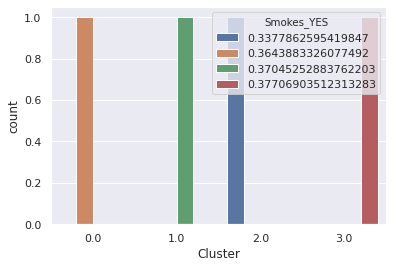

In [540]:
sns.countplot(x='Cluster', hue='Smokes_YES', data=dfstack)
plt.show()

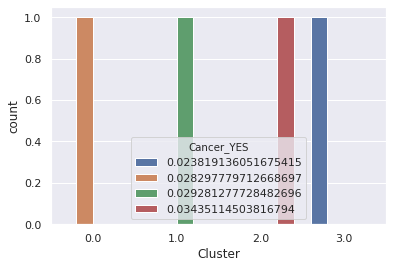

In [543]:
sns.countplot(x='Cluster', hue='Cancer_YES', data=dfstack)
plt.show()

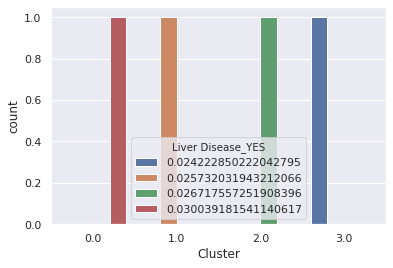

In [549]:
sns.countplot(x='Cluster', hue='Liver Disease_YES', data=dfstack)
plt.show()

In [532]:
clusterer.probabilities_

array([1.        , 1.        , 1.        , ..., 0.        , 0.80768266,
       1.        ])

In [535]:
clusterer.labels_

array([ 0,  3,  0, ..., -1,  1,  3])

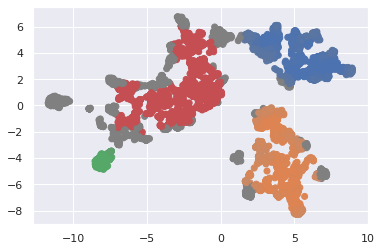

In [533]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(standard_embedding.T[0], standard_embedding.T[1], c=cluster_colors)

In [534]:
clusterer.outlier_scores_

array([0.        , 0.        , 0.        , ..., 0.14014344, 0.19231734,
       0.        ])



**Cluster Correlations**

Having played enough with the funny TSNE visualizations, let's try investigate what is actually inside the clusters identified by HDBSCAN.

**We'll do that by going through each cluster, and finding the features that are highly correlated within those cluster**s.

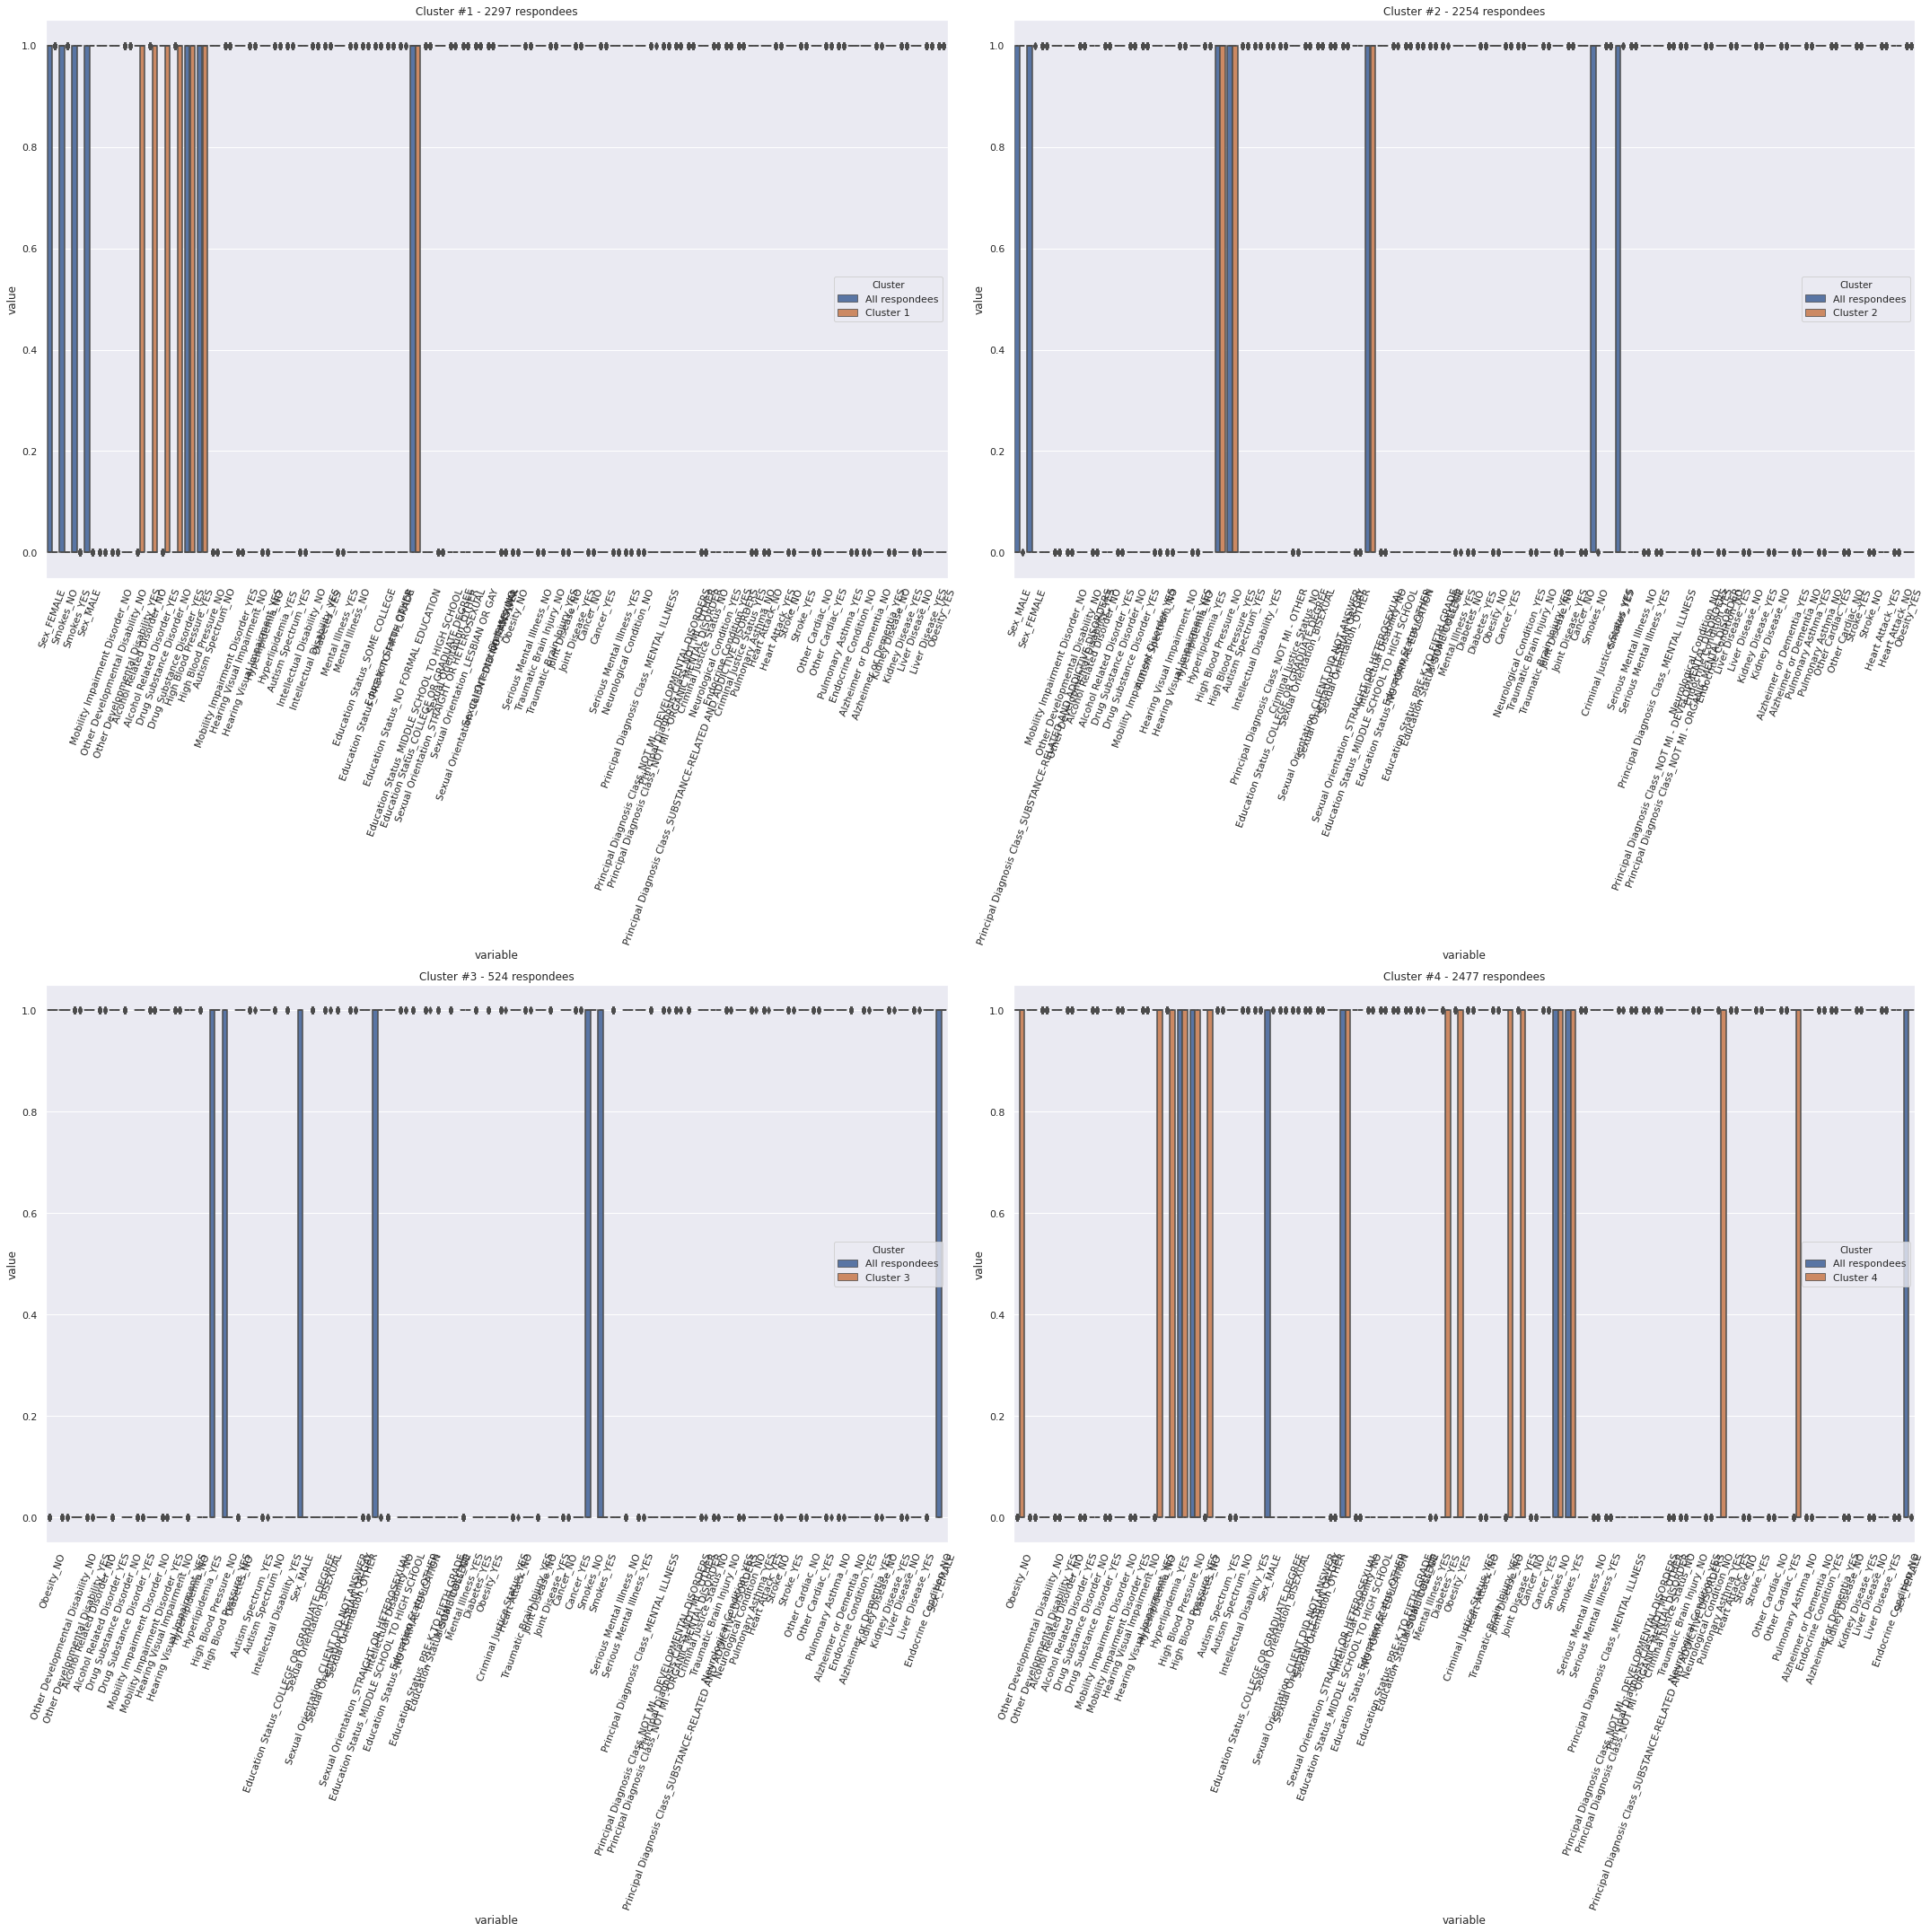

In [0]:

# Get the data for each cluster (not noise, aka -1)
unique_clusters = [c for c in np.unique(clusterer.labels_) if c > -1]
        
# Create a figure for holding the correlation plots
cols = 2
rows = np.ceil(len(unique_clusters) / cols).astype(int)
_, axes = plt.subplots(rows, cols, figsize=(30, 15*rows))
if rows > 1:
    axes = [x for l in axes for x in l]

# Calculate sample means
sample_mean = health_dummies.median()

# Go through clusters identified by HDBSCAN
for i, label in enumerate(unique_clusters):
    #print('label  ', label)

   # Get index of this cluster
    idx = clusterer.labels_ == label


    # Identify feature where the median differs significantly
    median_diff = (health_dummies.median() - health_dummies[idx].median()).abs().sort_values(ascending=False)

    # Create boxplot of these features for all vs cluster
    top = median_diff.index[0:74]
    temp_concat = pd.concat([health_dummies.loc[:, top], health_dummies.loc[idx, top]], axis=0).reset_index(drop=True)
    temp_concat['Cluster'] = 'Cluster {}'.format(i+1)
    temp_concat.loc[0:len(health_dummies),'Cluster'] = 'All respondees'
    temp_long = pd.melt(temp_concat, id_vars='Cluster')

    sns.boxplot(x='variable', y='value', hue='Cluster', data=temp_long, ax=axes[i])
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(70)
    axes[i].set_title(f'Cluster #{i+1} - {idx.sum()} respondees')    

# Tight layout    
plt.tight_layout()
plt.show()

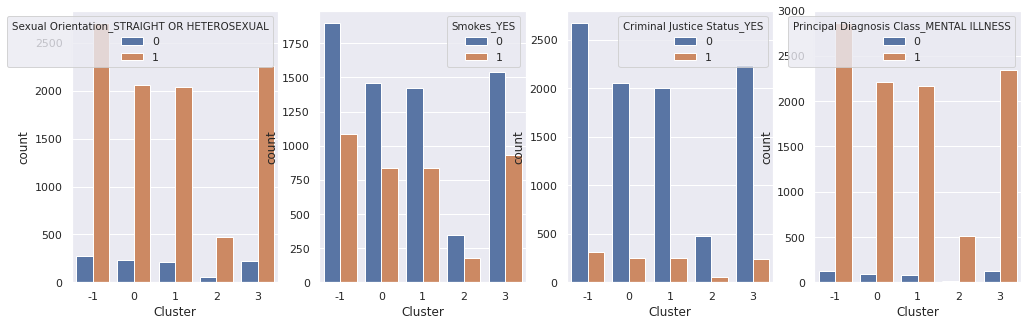

In [633]:
fig, ax = plt.subplots(1, 4, figsize=(17,5))
sns.countplot(x='Cluster', hue='Sexual Orientation_STRAIGHT OR HETEROSEXUAL', data=health_dummies, ax=ax[0])
sns.countplot(x='Cluster', hue='Smokes_YES', data=health_dummies, ax=ax[1])
sns.countplot(x='Cluster', hue='Criminal Justice Status_YES', data=health_dummies, ax=ax[2])
sns.countplot(x='Cluster', hue='Principal Diagnosis Class_MENTAL ILLNESS', data=health_dummies, ax=ax[3])
plt.show()

In [0]:
ax = sns.barplot(x="x", y="x", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

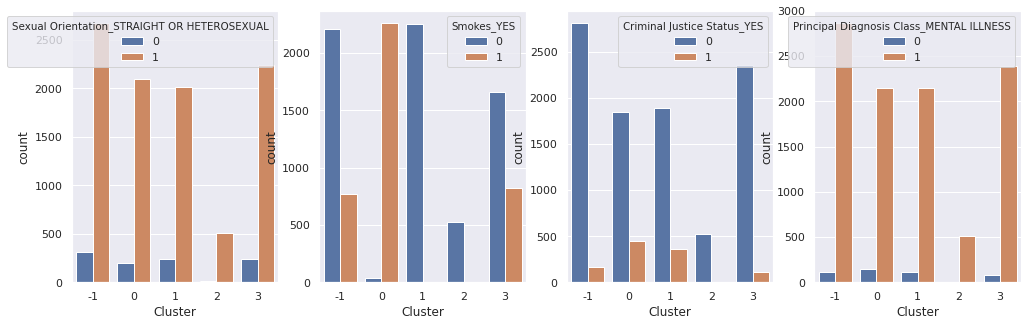

In [0]:
fig, ax = plt.subplots(1, 4, figsize=(17,5))
sns.countplot(x='Cluster', hue='Sexual Orientation_STRAIGHT OR HETEROSEXUAL', data=health_dummies, ax=ax[0])
sns.countplot(x='Cluster', hue='Smokes_YES', data=health_dummies, ax=ax[1])
sns.countplot(x='Cluster', hue='Criminal Justice Status_YES', data=health_dummies, ax=ax[2])
sns.countplot(x='Cluster', hue='Principal Diagnosis Class_MENTAL ILLNESS', data=health_dummies, ax=ax[3])
plt.show()

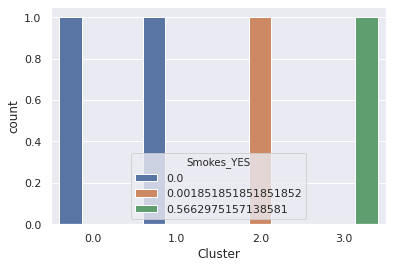

In [0]:
sns.countplot(x='Cluster', hue='Smokes_YES', data=dfstack)
plt.show()

In [0]:
np.sum(clustered) / health_dummies .shape[0]

0.947488367676384

**/////////////////////////////////////////////////////////////////////////////**

**///////////////////////////////////////////////////////////////////////////**

##**KMODES**

In [598]:
cost = []
for num_clusters in list(range(1,7)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(health2)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 36459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2368, cost: 32871.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4306, cost: 29816.0
Run 1, iteration: 2/100, moves: 869, cost: 29762.0
Run 1, iteration: 3/100, moves: 0, cost: 29762.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3216, cost: 29837.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2948, cost: 27132.0
Run 1, iteration: 2/100, moves: 143, cost: 27132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4643, cost: 26800.0
Run 1, iteration: 2/100, moves: 2346, cost: 26532.0
Run 1, i

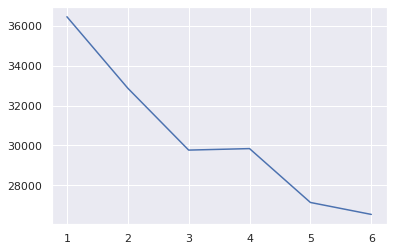

In [599]:
y = np.array([i for i in range(1,7,1)])
plt.plot(y,cost)

In [0]:
km = KModes(n_init=10,n_clusters=4, init='Huang', verbose=1)

In [601]:
clusters = km.fit_predict(health2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2030, cost: 28637.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2769, cost: 27910.0
Run 2, iteration: 2/100, moves: 591, cost: 27910.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3297, cost: 29923.0
Run 3, iteration: 2/100, moves: 995, cost: 29923.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4360, cost: 29570.0
Run 4, iteration: 2/100, moves: 68, cost: 29570.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3443, cost: 28628.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 3096, cost: 29666.0
Run 6, iteration: 2/100, moves: 4176, cost: 27522.0
Run 

In [602]:
clusters

array([2, 3, 3, ..., 2, 3, 2], dtype=uint16)

In [603]:
print(km.cluster_centroids_)

[['MALE' 'STRAIGHT OR HETEROSEXUAL' 'MIDDLE SCHOOL TO HIGH SCHOOL' 'YES'
  'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
  'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
  'MENTAL ILLNESS' 'NO']
 ['FEMALE' 'STRAIGHT OR HETEROSEXUAL' 'MIDDLE SCHOOL TO HIGH SCHOOL'
  'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO'
  'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
  'MENTAL ILLNESS' 'NO']
 ['FEMALE' 'STRAIGHT OR HETEROSEXUAL' 'MIDDLE SCHOOL TO HIGH SCHOOL'
  'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
  'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
  'MENTAL ILLNESS' 'NO']
 ['MALE' 'STRAIGHT OR HETEROSEXUAL' 'MIDDLE SCHOOL TO HIGH SCHOOL' 'YES'
  'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
  'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
  'MENTAL ILLNESS' 'NO']]


In [0]:
clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)

In [0]:
clusterCentroidsDf.columns = health2.columns

In [606]:
clusterCentroidsDf


,Sex,Sexual Orientation,Education Status,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Smokes,Serious Mental Illness,Principal Diagnosis Class,Criminal Justice Status
0,MALE,STRAIGHT OR HETEROSEXUAL,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,MENTAL ILLNESS,NO
1,FEMALE,STRAIGHT OR HETEROSEXUAL,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NO
2,FEMALE,STRAIGHT OR HETEROSEXUAL,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NO
3,MALE,STRAIGHT OR HETEROSEXUAL,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NO


In [0]:
health_original=health2.copy().reset_index()

In [0]:
clustersDf=pd.DataFrame(clusters)

In [0]:
clustersDf.columns=['clusters_predicted']

In [0]:
combinedDf=pd.concat([health_original,clustersDf],axis=1).reset_index()

In [0]:
combinedDf=combinedDf.drop(['index','level_0'],axis=1)

In [612]:
combinedDf.head()

,Sex,Sexual Orientation,Education Status,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Smokes,Serious Mental Illness,Principal Diagnosis Class,Criminal Justice Status,clusters_predicted
0,FEMALE,STRAIGHT OR HETEROSEXUAL,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,YES,MENTAL ILLNESS,NO,2
1,MALE,STRAIGHT OR HETEROSEXUAL,COLLEGE OR GRADUATE DEGREE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NO,3
2,MALE,STRAIGHT OR HETEROSEXUAL,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,YES,3
3,MALE,STRAIGHT OR HETEROSEXUAL,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,YES,1
4,FEMALE,STRAIGHT OR HETEROSEXUAL,COLLEGE OR GRADUATE DEGREE,YES,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,NO,2


In [0]:
cluster_0 = combinedDf[combinedDf['clusters_predicted'] == 0]

In [614]:
cluster_0.shape

(3081, 32)

In [0]:
cluster_1 = combinedDf[combinedDf['clusters_predicted'] == 1]

In [619]:
cluster_1.shape

(1352, 32)

In [620]:
cluster_2 = combinedDf[combinedDf['clusters_predicted'] == 2]
cluster_2.shape

(4095, 32)

In [621]:
cluster_3 = combinedDf[combinedDf['clusters_predicted'] == 3]
cluster_3.shape

(2003, 32)

In [622]:
cluster_4 = combinedDf[combinedDf['clusters_predicted'] == 4]
cluster_4.shape

(0, 32)

In [0]:
cluster_0['Smokes'].value_counts()

NO     2330
YES     907
Name: Smokes, dtype: int64

In [0]:
cluster_1['Liver Disease'].value_counts()

NO     1486
YES     106
Name: Liver Disease, dtype: int64

In [0]:
cluster_1['Smokes'].value_counts()

YES    1592
Name: Smokes, dtype: int64

In [0]:
cluster_2['Smokes'].value_counts()

NO     1659
YES     196
Name: Smokes, dtype: int64

In [0]:
cluster_2['Liver Disease'].value_counts()

NO     2447
YES      28
Name: Liver Disease, dtype: int64

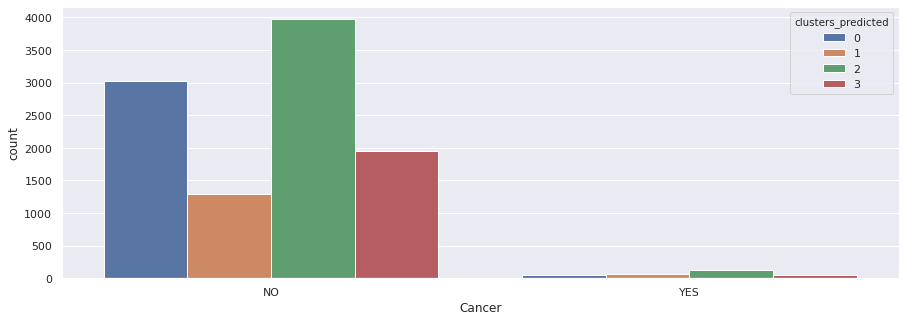

In [623]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Cancer'],order=combinedDf['Cancer'].value_counts().index,hue=combinedDf['clusters_predicted'])
plt.show()

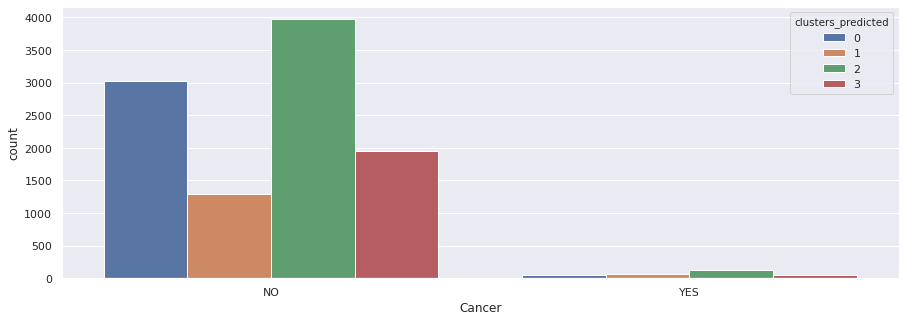

In [624]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Cancer'],order=combinedDf['Cancer'].value_counts().index,hue=combinedDf['clusters_predicted'])
plt.show()

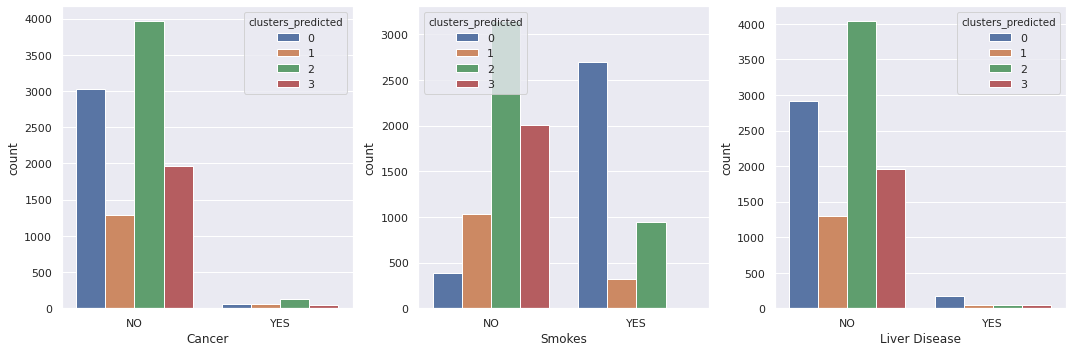

In [625]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['Cancer'],order=combinedDf['Cancer'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['Smokes'],order=combinedDf['Smokes'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['Liver Disease'],order=combinedDf['Liver Disease'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

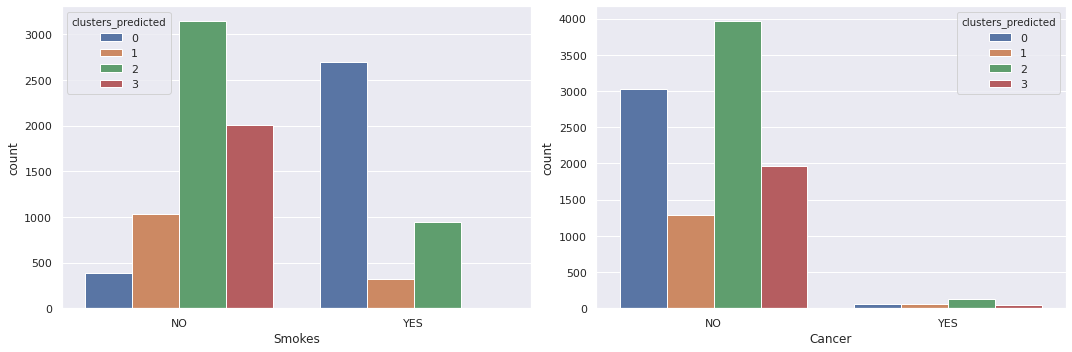

In [626]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['Smokes'],order=combinedDf['Smokes'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[0])

sns.countplot(x=combinedDf['Cancer'],order=combinedDf['Cancer'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

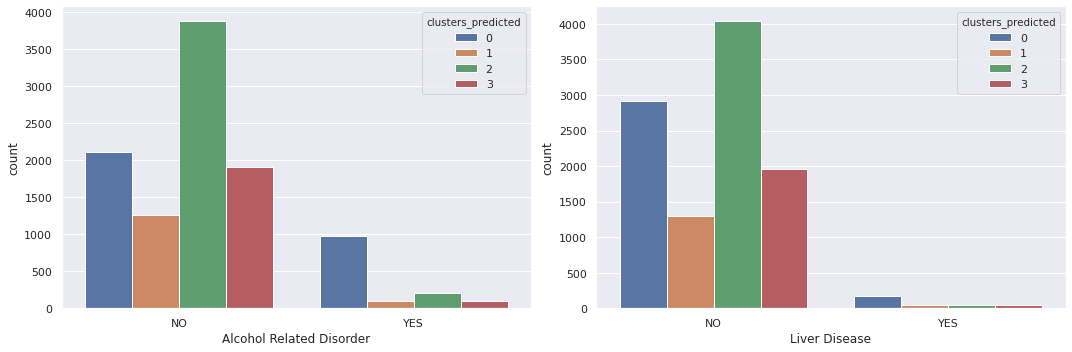

In [627]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['Alcohol Related Disorder'],order=combinedDf['Alcohol Related Disorder'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['Liver Disease'],order=combinedDf['Liver Disease'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

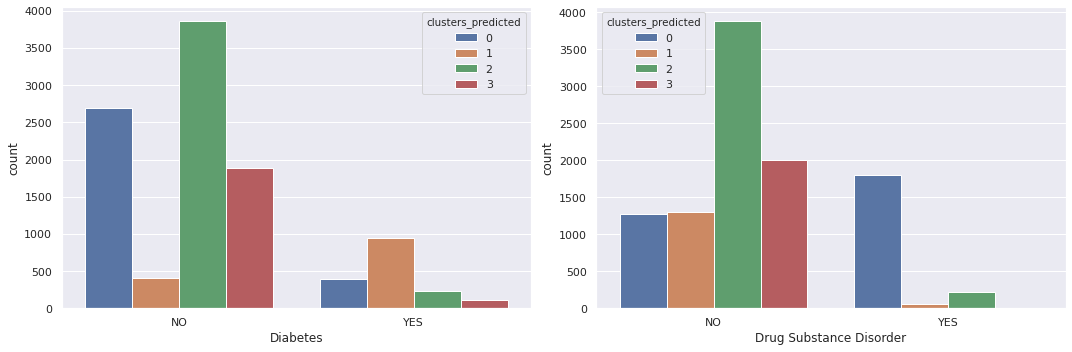

In [628]:
f, axs = plt.subplots(1,2,figsize = (15,5))

sns.countplot(x=combinedDf['Diabetes'],order=combinedDf['Diabetes'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['Drug Substance Disorder'],order=combinedDf['Drug Substance Disorder'].value_counts().index,hue=combinedDf['clusters_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

#**MCA**

In [629]:
! pip install prince

In [0]:
pip install --user mca

  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=5996 sha256=ccb00b86be8a604ae72ce2329e8bbc0e202faa506072f952d1c4777db68be73b
  Stored in directory: /root/.cache/pip/wheels/01/fb/ff/19d72d65c8bb01d4af40c9c2ca20fd267d1969b3b5f8dd60d6
Successfully built mca


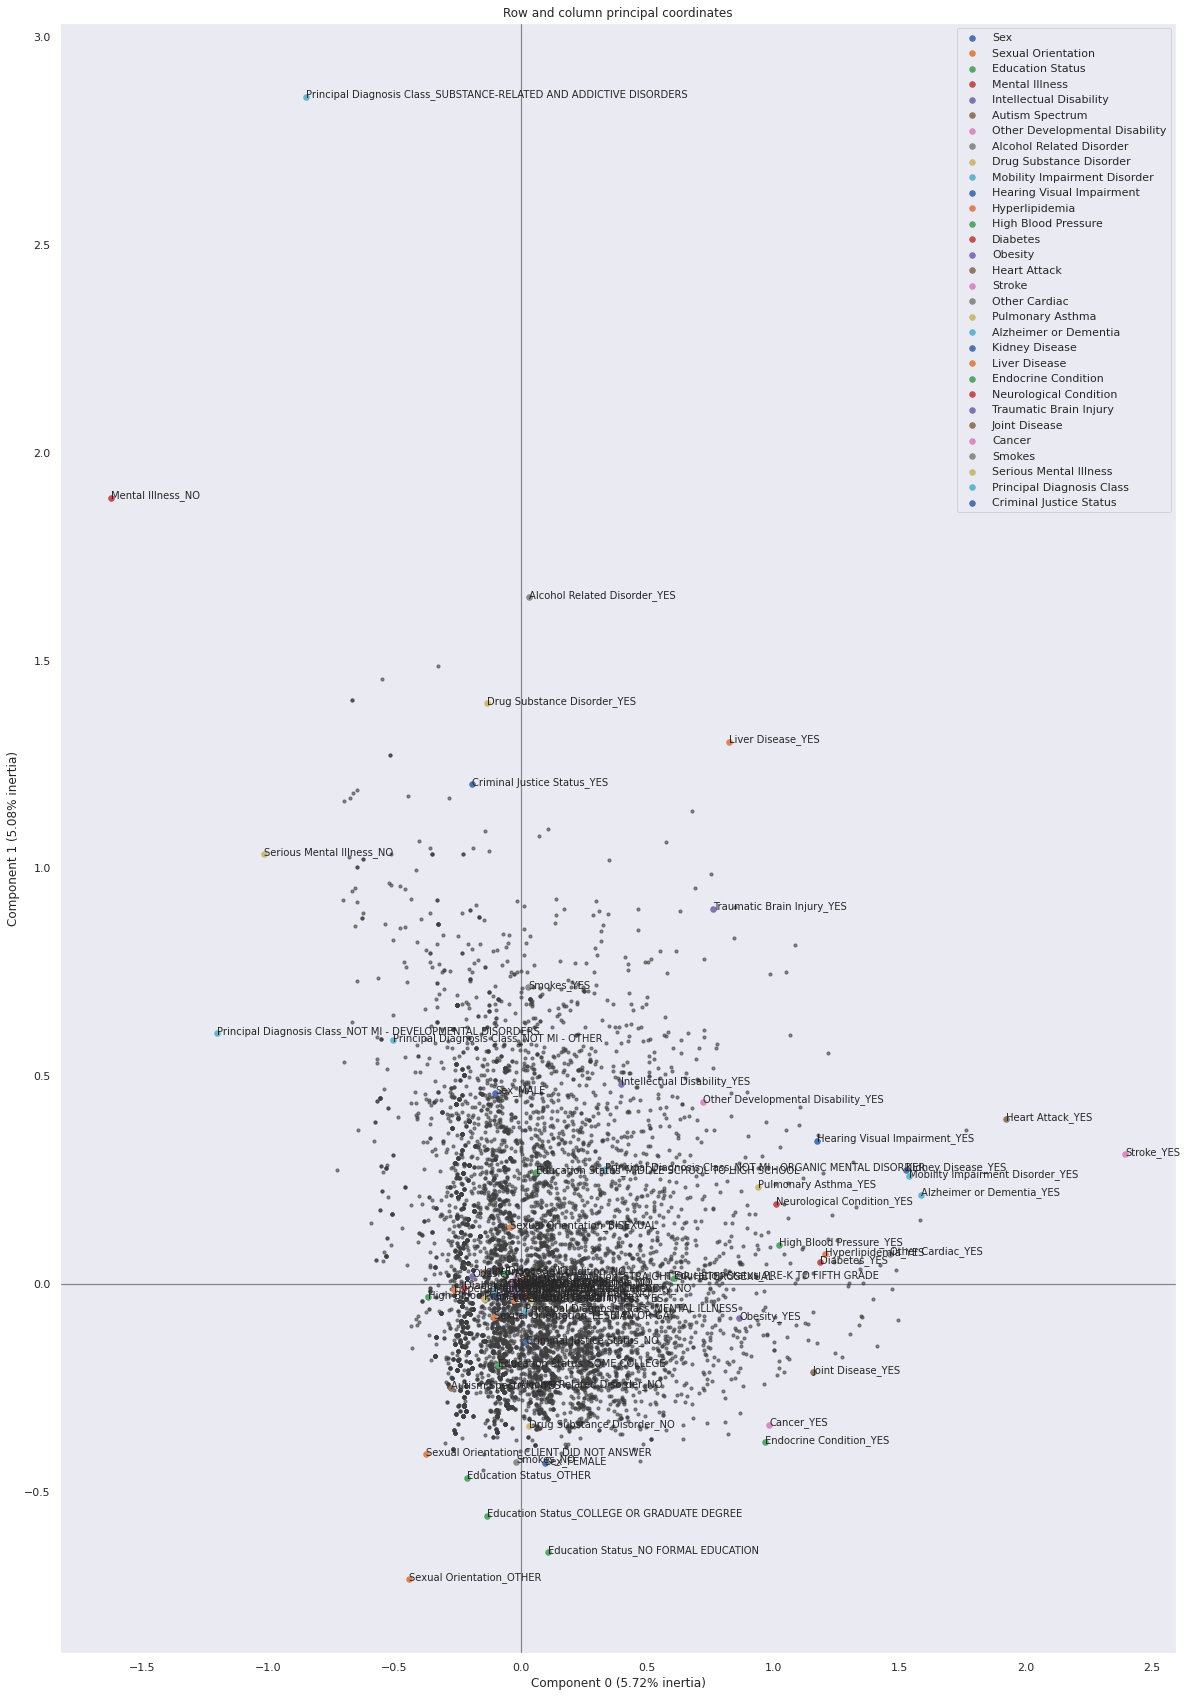

In [630]:
import prince
mca = prince.MCA()
df_mca = mca.fit_transform(health2)
mca.plot_coordinates(X=health2, figsize=(20,30), show_column_labels=True)
plt.show()

In [0]:
df_mca2=np.array(df_mca)

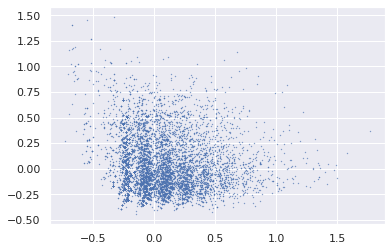

In [632]:
plt.scatter(df_mca2[:, 0], df_mca2[:, 1],  s=0.1, cmap='Spectral');